In [1]:
from IPython.display import YouTubeVideo

def embed_video(index, playlist='PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ'):
    return YouTubeVideo('', index = index - 1, list = playlist, width = 600, height = 350)

In [2]:
embed_video(1)

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from jupyter_workflow.data import get_fremont_data
    

In [32]:
data = get_fremont_data()
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [5]:
%alias head powershell -command "& {Get-Content %s -Head 10}"
%head Fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,9,4
10/03/2012 01:00:00 AM,6,4
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,3,2
10/03/2012 04:00:00 AM,1,6
10/03/2012 05:00:00 AM,10,21
10/03/2012 06:00:00 AM,50,105
10/03/2012 07:00:00 AM,95,257
10/03/2012 08:00:00 AM,146,291


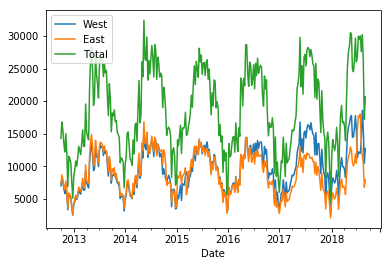

In [6]:
data.resample('W').sum().plot()

In [7]:
embed_video(2)

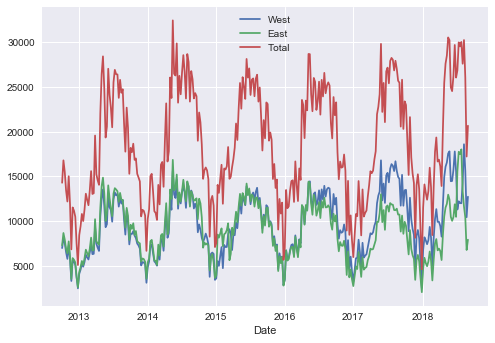

In [8]:
plt.style.use('seaborn')
ax = data.resample('W').sum().plot()


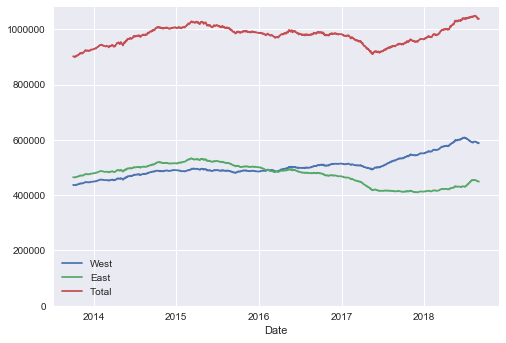

In [9]:
data['Total'] = data['West'] + data['East']

ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None);

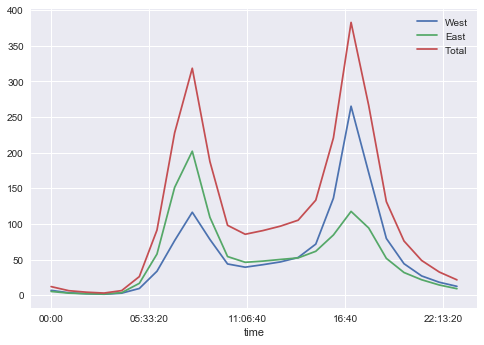

In [10]:
data.groupby(data.index.time).mean().plot();

In [11]:
pivoted = data.pivot_table('Total', index = data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


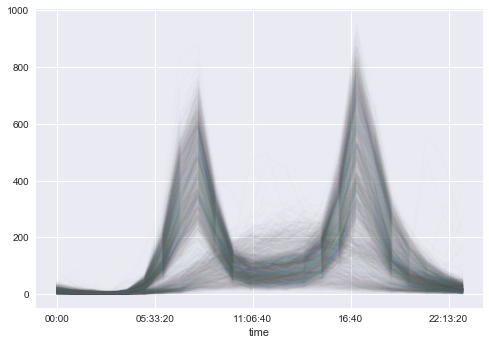

In [12]:
pivoted.plot(legend=False, alpha=0.01);

In [13]:
embed_video(3)
#created git repository

In [14]:
embed_video(4)
#nesukure .gitignore failo.
#patvarkem biski notbook'a

In [35]:
embed_video(5)
#touch in win -> type nul > your_file.txt

In [38]:
get_fremont_data?
# funkcija veikia, betdocsstring neranda


In [40]:
embed_video(6)
#to test functions
#C:\Anaconda3\python.exe -m pytest jupyter_workflow
#make file leidziam per VS command prompt --> nmake -f Makefile

In [41]:
embed_video(7)
#refactored data function, try catch block added and strftime with stringformat -> datetime64 formatas

In [43]:
embed_video(8)
#tvarke buga, pas mane nebuvo jo, teisingai string_format uzrasiau. Papildziau unit testing
#sukurtas naujas notebook 

In [45]:
embed_video(9)
#nesiunciu bugo scikit'o teamui

In [47]:
embed_video(10)
#nais

In [ ]:
embed_video(11)
#done in UnsupervisedAnalysis
#git repository - https://github.com/donatas522/JupyterWorkFlo2